# Sales Data Analysis :-

### The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc of 12 months.

                 --> We are going to analyse this data using pandas and matplotlib

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style

## Read the data or import the data :-

In [2]:
data = pd.read_csv("C:/Users/meetp/Desktop/PROJECTS/Sales_data.csv")
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Check the size of our data using .shape
###### It shows the total number of records/rows and columns in our dataset

In [3]:
data.shape

(186850, 6)

# .columns
#### It shows the name of the columns

In [4]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

#  .index to check  the indexing of our dataset

In [5]:
data.index

RangeIndex(start=0, stop=186850, step=1)

# .nunique()
##### It shows the total no. of unique values in each column of the dataframe.It can be applied on the perticular column as well.

In [6]:
data.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

# How we can check which are those unique values? 

In [7]:
data['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64

# check the data type of our data 
###### .info() gives all the information about the data 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [9]:
data['Product'].dtype

dtype('O')

# Is There Any missing values?

In [10]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
data.dropna(inplace=True)   #drop NAN values

In [12]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

##   Analysis 1: What was the best month for sales? How much was earned that month?

In [13]:
# ValueError: invalid literal for int() with base 10: 'Or' - selecting month 
data = data[data['Order Date'].str[0:2] != 'Or']


In [14]:
# FROM orderDATE column - select month
data['Month'] = data['Order Date'].str[0:2]

In [15]:
data['Month'].astype('int32')

0         4
2         4
3         4
4         4
5         4
         ..
186845    9
186846    9
186847    9
186848    9
186849    9
Name: Month, Length: 185950, dtype: int32

In [16]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [17]:
#Month column we need jan/feb - !01,02 
dict_month = {'01':'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May',
           '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

data['Month'] = data['Month'].apply(lambda x : dict_month[x])

In [18]:
data.sample(10) # month column replaced with JAN/FEB

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
48431,312900,Apple Airpods Headphones,1,150,12/07/19 11:11,"818 8th St, Boston, MA 02215",Dec
142292,283737,AA Batteries (4-pack),2,3.84,11/25/19 23:16,"117 Elm St, New York City, NY 10001",Nov
57155,152069,Bose SoundSport Headphones,1,99.99,02/04/19 02:18,"545 Hickory St, Portland, OR 97035",Feb
94970,213084,Lightning Charging Cable,1,14.95,06/27/19 11:57,"754 9th St, New York City, NY 10001",Jun
37962,302882,Apple Airpods Headphones,1,150,12/29/19 17:05,"162 Adams St, San Francisco, CA 94016",Dec
123817,197253,AAA Batteries (4-pack),1,2.99,05/20/19 21:57,"257 Dogwood St, Los Angeles, CA 90001",May
49576,313991,Bose SoundSport Headphones,1,99.99,12/29/19 23:15,"452 Elm St, Los Angeles, CA 90001",Dec
161099,265382,Bose SoundSport Headphones,1,99.99,10/03/19 00:44,"752 Adams St, New York City, NY 10001",Oct
145737,287028,Bose SoundSport Headphones,1,99.99,11/21/19 08:47,"312 8th St, Portland, OR 97035",Nov
129964,203094,Bose SoundSport Headphones,1,99.99,05/22/19 12:09,"147 River St, Seattle, WA 98101",May


In [19]:
# create sales column - price * qty :- convert object to int type

In [20]:
data['Price Each'] = data['Price Each'].astype('float')
data['Quantity Ordered'] = data['Quantity Ordered'].astype('float')

In [21]:
data['Sales'] = data['Price Each'] * data['Quantity Ordered']

In [22]:
data.sample(10)    #sales column created 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
158685,263078,USB-C Charging Cable,1.0,11.95,10/20/19 09:37,"390 Jackson St, Austin, TX 73301",Oct,11.95
106957,163619,LG Washing Machine,1.0,600.00,03/18/19 20:18,"470 12th St, Atlanta, GA 30301",Mar,600.00
132828,205822,34in Ultrawide Monitor,1.0,379.99,05/18/19 21:58,"223 12th St, San Francisco, CA 94016",May,379.99
45280,309878,USB-C Charging Cable,1.0,11.95,12/24/19 15:39,"159 River St, San Francisco, CA 94016",Dec,11.95
32747,297900,AAA Batteries (4-pack),1.0,2.99,12/19/19 21:27,"429 South St, Seattle, WA 98101",Dec,2.99
168572,272510,USB-C Charging Cable,1.0,11.95,10/17/19 15:26,"151 12th St, New York City, NY 10001",Oct,11.95
55487,319647,AA Batteries (4-pack),2.0,3.84,12/28/19 17:43,"119 Spruce St, San Francisco, CA 94016",Dec,7.68
18586,236868,Wired Headphones,1.0,11.99,08/29/19 23:19,"363 2nd St, Boston, MA 02215",Aug,11.99
184249,256868,Wired Headphones,1.0,11.99,09/19/19 23:27,"235 Willow St, Dallas, TX 75001",Sep,11.99
48374,312847,Wired Headphones,1.0,11.99,12/30/19 17:05,"258 Dogwood St, New York City, NY 10001",Dec,11.99


In [23]:
highest_sales =  data.groupby('Month').sum()
highest_sales.head()

,Quantity Ordered,Price Each,Sales
Month,,,
Apr,20558.0,3.367671e+06,3.390670e+06
Aug,13448.0,2.230345e+06,2.244468e+06
Dec,28114.0,4.588415e+06,4.613443e+06
Feb,13449.0,2.188885e+06,2.202022e+06
Jan,10903.0,1.811768e+06,1.822257e+06


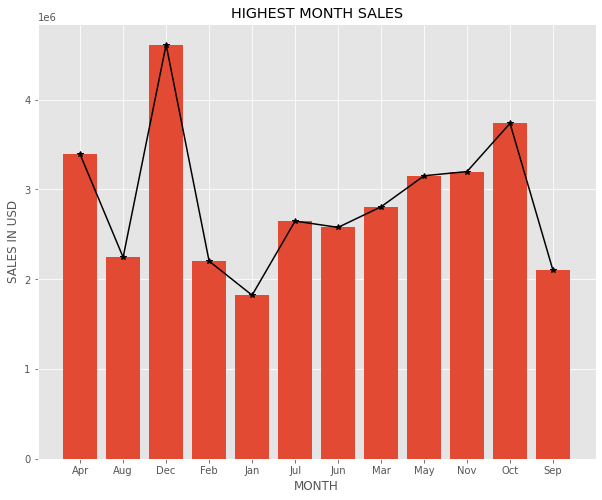

In [24]:
style.use("ggplot")
plt.figure(figsize=(10,8))
plt.bar(highest_sales.index,highest_sales['Sales'])
plt.plot(highest_sales.index,highest_sales['Sales'],'black',marker = '*')
plt.title("HIGHEST MONTH SALES")
plt.xlabel('MONTH')
plt.ylabel('SALES IN USD')
plt.savefig('C:/Users/meetp/Desktop/PROJECTS/highest_month_sale')
plt.show()

# Analysis 2:  What city sold the most product?

In [25]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99


In [26]:
#FROM Purchase Address - we need to split city - .split(',')

data['City']= data['Purchase Address'].apply(lambda x : x.split(',')[1])


In [27]:
data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
104877,222542,Apple Airpods Headphones,1.0,150.00,06/25/19 20:35,"466 6th St, San Francisco, CA 94016",Jun,150.00,San Francisco
64364,158955,Vareebadd Phone,1.0,400.00,02/19/19 02:26,"930 Walnut St, San Francisco, CA 94016",Feb,400.00,San Francisco
49637,314050,USB-C Charging Cable,1.0,11.95,12/05/19 12:24,"299 Maple St, San Francisco, CA 94016",Dec,11.95,San Francisco
143310,284705,Lightning Charging Cable,1.0,14.95,11/25/19 16:23,"853 Chestnut St, Los Angeles, CA 90001",Nov,14.95,Los Angeles
115147,171453,Apple Airpods Headphones,1.0,150.00,03/06/19 08:41,"895 13th St, San Francisco, CA 94016",Mar,150.00,San Francisco
100843,218696,Wired Headphones,1.0,11.99,06/11/19 13:01,"858 Hickory St, San Francisco, CA 94016",Jun,11.99,San Francisco
55718,150698,34in Ultrawide Monitor,1.0,379.99,02/08/19 13:19,"375 Maple St, Los Angeles, CA 90001",Feb,379.99,Los Angeles
154168,295072,Flatscreen TV,1.0,300.00,11/01/19 12:08,"187 River St, New York City, NY 10001",Nov,300.00,New York City
16379,192184,Wired Headphones,1.0,11.99,04/04/19 21:11,"655 Jackson St, Austin, TX 73301",Apr,11.99,Austin
158685,263078,USB-C Charging Cable,1.0,11.95,10/20/19 09:37,"390 Jackson St, Austin, TX 73301",Oct,11.95,Austin


In [28]:
city_sales = data.groupby('City').sum()
city_sales.head()

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,16602.0,2.779908e+06,2.795499e+06
Austin,11153.0,1.809874e+06,1.819582e+06
Boston,22528.0,3.637410e+06,3.661642e+06
Dallas,16730.0,2.752628e+06,2.767975e+06
Los Angeles,33289.0,5.421435e+06,5.452571e+06


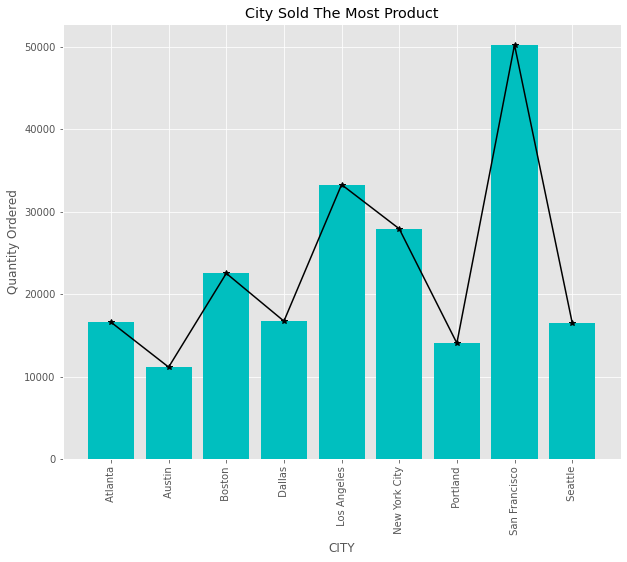

In [29]:
plt.figure(figsize=(10,8))
plt.bar(city_sales.index,city_sales['Quantity Ordered'],color = "c")
plt.plot(city_sales.index,city_sales['Quantity Ordered'],'black',marker='*')
plt.title('City Sold The Most Product')
plt.xlabel("CITY")
plt.ylabel("Quantity Ordered")
plt.xticks(rotation=90)
plt.savefig('C:/Users/meetp/Desktop/PROJECTS/highest_city_QuantityOrdered')
plt.show()

# Analysis 3: What time should we display advertisements to maximize likelihood of customer’s buying products?

In [30]:
data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
114431,170764,Lightning Charging Cable,1.0,14.95,03/17/19 20:14,"225 West St, Dallas, TX 75001",Mar,14.95,Dallas
146444,287704,AA Batteries (4-pack),1.0,3.84,11/10/19 11:24,"996 Center St, Atlanta, GA 30301",Nov,3.84,Atlanta
158922,263307,USB-C Charging Cable,1.0,11.95,10/18/19 14:46,"601 10th St, New York City, NY 10001",Oct,11.95,New York City
16827,192618,iPhone,1.0,700.00,04/25/19 04:32,"198 Pine St, Austin, TX 73301",Apr,700.00,Austin
114667,170990,AA Batteries (4-pack),1.0,3.84,03/17/19 13:30,"830 Pine St, New York City, NY 10001",Mar,3.84,New York City
149449,290570,Vareebadd Phone,1.0,400.00,11/07/19 19:03,"397 8th St, San Francisco, CA 94016",Nov,400.00,San Francisco
167884,271858,USB-C Charging Cable,1.0,11.95,10/30/19 11:13,"290 Madison St, New York City, NY 10001",Oct,11.95,New York City
47058,311594,AAA Batteries (4-pack),1.0,2.99,12/16/19 17:41,"194 Walnut St, New York City, NY 10001",Dec,2.99,New York City
128341,201555,Google Phone,1.0,600.00,05/21/19 13:28,"449 Highland St, Los Angeles, CA 90001",May,600.00,Los Angeles
177569,250457,Bose SoundSport Headphones,1.0,99.99,09/17/19 12:12,"314 Meadow St, Boston, MA 02215",Sep,99.99,Boston


In [31]:
data['Time'] = data['Order Date'].apply(lambda x : x.split(' ')[1]) #created time column from order date - .split(' ')

In [32]:
data['Time'] = data['Time'].str[0:2]

In [33]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In [34]:
time_maxPproduct = data.groupby("Time").sum()
time_maxPproduct.head()

,Quantity Ordered,Price Each,Sales
Time,,,
00,4428.0,709296.70,713721.27
01,2619.0,458490.00,460866.88
02,1398.0,233833.64,234851.44
03,928.0,144726.42,145757.89
04,937.0,162058.18,162661.01


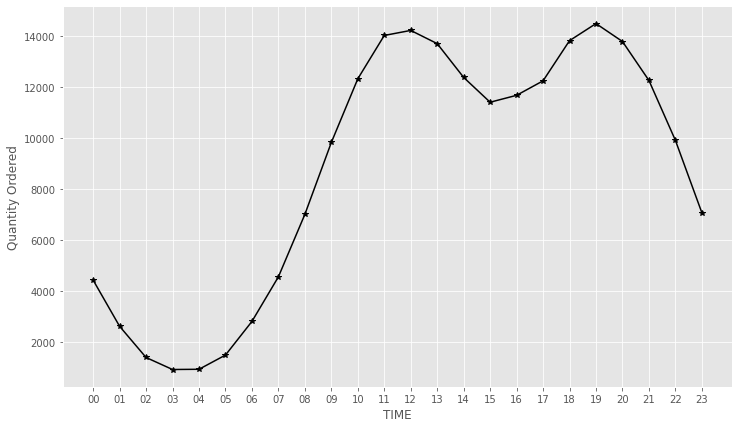

In [90]:
plt.figure(figsize=(12,7))
plt.plot(time_maxPproduct.index,time_maxPproduct['Quantity Ordered'],'black',marker = "*")
plt.xlabel("TIME")
plt.ylabel("Quantity Ordered")
plt.savefig('C:/Users/meetp/Desktop/PROJECTS/time_product_max')
plt.show()

### Analysis 4:  What Products are most often sold together?

In [36]:
data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
175973,248931,34in Ultrawide Monitor,1.0,379.99,09/16/19 16:17,"715 Johnson St, Seattle, WA 98101",Sep,379.99,Seattle,16
30906,296150,Apple Airpods Headphones,1.0,150.00,12/04/19 14:00,"205 Cherry St, New York City, NY 10001",Dec,150.00,New York City,14
57973,152852,iPhone,1.0,700.00,02/28/19 08:47,"748 8th St, Seattle, WA 98101",Feb,700.00,Seattle,08
76711,149967,USB-C Charging Cable,1.0,11.95,01/07/19 17:00,"812 Meadow St, San Francisco, CA 94016",Jan,11.95,San Francisco,17
91813,210087,Lightning Charging Cable,1.0,14.95,06/30/19 12:11,"720 Dogwood St, San Francisco, CA 94016",Jun,14.95,San Francisco,12


In [37]:
data_duplicates = data[data['Order ID'].duplicated(keep=False)]
data_duplicates.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11


In [38]:
data_duplicates['Product_bundle'] =  data_duplicates.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

<ipython-input-38-ce25aa5150d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_duplicates['Product_bundle'] =  data_duplicates.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


In [39]:
data_duplicates.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Product_bundle
28346,246197,iPhone,1.0,700.00,08/27/19 02:30,"718 Sunset St, Dallas, TX 75001",Aug,700.00,Dallas,02,"iPhone,AA Batteries (4-pack)"
118360,174515,USB-C Charging Cable,1.0,11.95,03/22/19 10:19,"829 Sunset St, San Francisco, CA 94016",Mar,11.95,San Francisco,10,"Vareebadd Phone,USB-C Charging Cable"
124156,197578,Google Phone,1.0,600.00,05/27/19 23:36,"62 Hickory St, Boston, MA 02215",May,600.00,Boston,23,"Google Phone,Wired Headphones"
18058,193787,Wired Headphones,1.0,11.99,04/27/19 08:15,"29 Willow St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,08,"iPhone,Apple Airpods Headphones,Wired Headphones"
181842,254554,Bose SoundSport Headphones,1.0,99.99,09/25/19 17:28,"462 Willow St, San Francisco, CA 94016",Sep,99.99,San Francisco,17,"Google Phone,Bose SoundSport Headphones"
122203,195714,27in FHD Monitor,1.0,149.99,05/05/19 22:36,"756 Ridge St, San Francisco, CA 94016",May,149.99,San Francisco,22,"27in FHD Monitor,AAA Batteries (4-pack)"
186342,258878,Lightning Charging Cable,1.0,14.95,09/17/19 15:49,"812 Ridge St, Seattle, WA 98101",Sep,14.95,Seattle,15,"Lightning Charging Cable,27in 4K Gaming Monitor"
56845,151776,20in Monitor,1.0,109.99,02/04/19 21:24,"517 Main St, New York City, NY 10001",Feb,109.99,New York City,21,"USB-C Charging Cable,20in Monitor"
100169,218057,Apple Airpods Headphones,1.0,150.00,06/15/19 18:29,"16 Madison St, San Francisco, CA 94016",Jun,150.00,San Francisco,18,"Apple Airpods Headphones,AA Batteries (4-pack)"
182056,254757,Apple Airpods Headphones,1.0,150.00,09/10/19 17:38,"961 Park St, San Francisco, CA 94016",Sep,150.00,San Francisco,17,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [40]:
data_duplicates.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Product_bundle
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",Apr,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [41]:
data_duplicates = data_duplicates[['Order ID','Product_bundle']].drop_duplicates()
data_duplicates.head()

,Order ID,Product_bundle
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [42]:
from itertools import combinations
from collections import Counter

In [43]:
count=Counter()
for row in data_duplicates['Product_bundle']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#  Analysis 5: What product sold the most? Why do you think it did?

In [44]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99,Los Angeles,09


In [45]:
pro_sold = data.groupby('Product').sum()
pro_sold.head()

,Quantity Ordered,Price Each,Sales
Product,,,
20in Monitor,4129.0,451068.99,454148.71
27in 4K Gaming Monitor,6244.0,2429637.70,2435097.56
27in FHD Monitor,7550.0,1125974.93,1132424.50
34in Ultrawide Monitor,6199.0,2348718.19,2355558.01
AA Batteries (4-pack),27635.0,79015.68,106118.40


In [46]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
  
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = pro_sold.index
    y = pro_sold['Quantity Ordered']

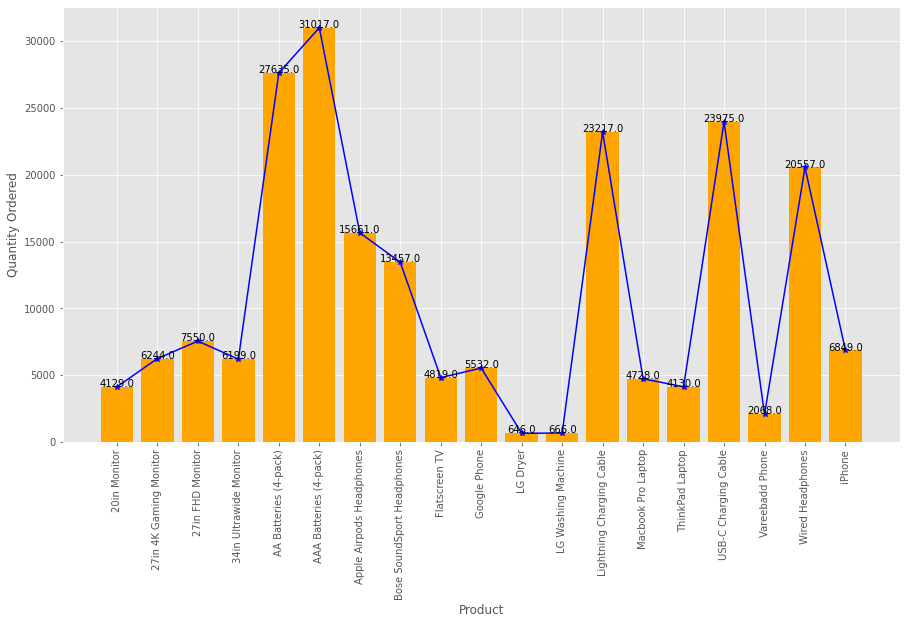

In [82]:
plt.figure(figsize=(15,8))
plt.bar(pro_sold.index,pro_sold['Quantity Ordered'],color ="orange")
plt.plot(pro_sold.index,pro_sold['Quantity Ordered'],"b",marker="*")
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
addlabels(x,y)
plt.xticks(rotation=90)
plt.savefig('C:/Users/meetp/Desktop/PROJECTS/highest_product_QuantityOrdered')
plt.show()

In [71]:
data.groupby('Product').count().T

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,4101,6230,7507,6181,20577,20641,15549,13325,4800,5525,646,666,21658,4724,4128,21903,2065,18882,6842
Quantity Ordered,4101,6230,7507,6181,20577,20641,15549,13325,4800,5525,646,666,21658,4724,4128,21903,2065,18882,6842
Price Each,4101,6230,7507,6181,20577,20641,15549,13325,4800,5525,646,666,21658,4724,4128,21903,2065,18882,6842
Order Date,4101,6230,7507,6181,20577,20641,15549,13325,4800,5525,646,666,21658,4724,4128,21903,2065,18882,6842
Purchase Address,4101,6230,7507,6181,20577,20641,15549,13325,4800,5525,646,666,21658,4724,4128,21903,2065,18882,6842
Month,4101,6230,7507,6181,20577,20641,15549,13325,4800,5525,646,666,21658,4724,4128,21903,2065,18882,6842
Sales,4101,6230,7507,6181,20577,20641,15549,13325,4800,5525,646,666,21658,4724,4128,21903,2065,18882,6842
City,4101,6230,7507,6181,20577,20641,15549,13325,4800,5525,646,666,21658,4724,4128,21903,2065,18882,6842
Time,4101,6230,7507,6181,20577,20641,15549,13325,4800,5525,646,666,21658,4724,4128,21903,2065,18882,6842


<ipython-input-96-391f76ab5a2e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['20in Monitor','27in 4K Gaming Monitor','27in FHD Monitor','34in Ultrawide Monitor','AA Batteries (4-pack)','AAA Batteries (4-pack)','Apple Airpods Headphones',


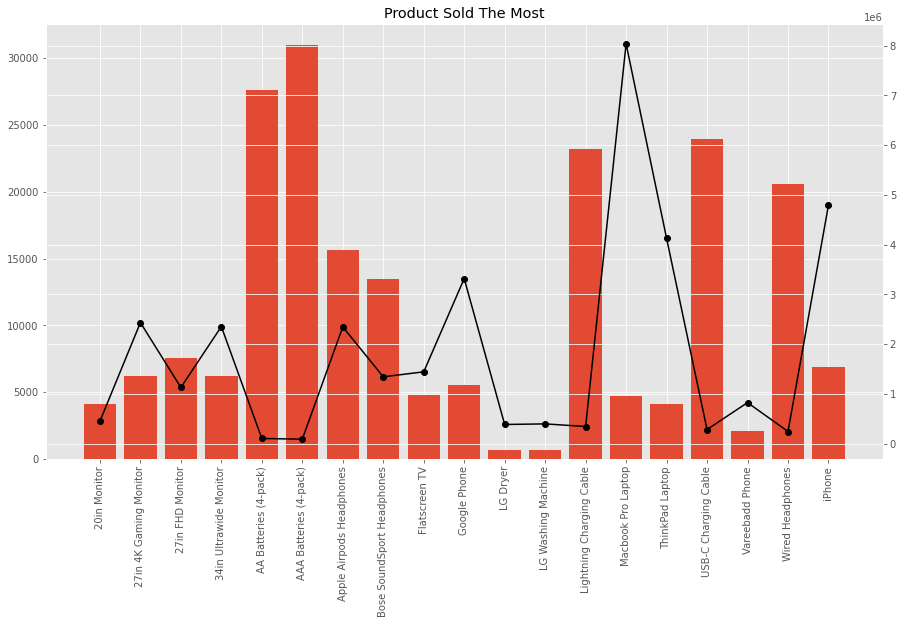

In [96]:
fig=plt.figure(figsize=(15,8))
ax1 = plt.subplot(1,1,1)
ax1.bar(pro_sold.index,pro_sold['Quantity Ordered'],) 
ax2 = ax1.twinx()               
ax2.plot(pro_sold.index,pro_sold['Sales'],'o-',color="black")   
ax1.set_xticklabels(['20in Monitor','27in 4K Gaming Monitor','27in FHD Monitor','34in Ultrawide Monitor','AA Batteries (4-pack)','AAA Batteries (4-pack)','Apple Airpods Headphones',

                     'Bose SoundSport Headphones','Flatscreen TV','Google Phone','LG Dryer','LG Washing Machine','Lightning Charging Cable','Macbook Pro Laptop','ThinkPad Laptop','USB-C Charging Cable','Vareebadd Phone','Wired Headphones','iPhone'],rotation = 90)

ax1.set_axisbelow(True)
plt.title('Product Sold The Most')
plt.savefig('C:/Users/meetp/Desktop/PROJECTS/product_sold_the_max')

plt.show()